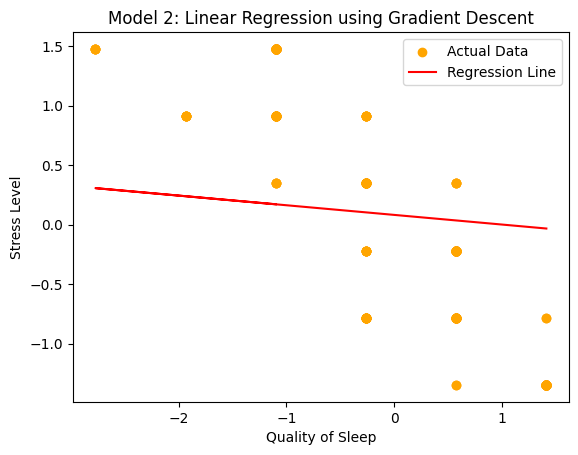

Model 1: slope(m) = -0.0810593847192886, Intercept(c) = 0.08187143764431021, MSE = 0.8675689828562189

Top 3 Variable Combinations:
1. Variables: ['Quality of Sleep'], MSE: 0.8675689828562189
2. Variables: ['Quality of Sleep', 'Physical Activity Level'], MSE: 0.8675689828562189
3. Variables: ['Quality of Sleep', 'Blood Pressure'], MSE: 0.8675689828562189


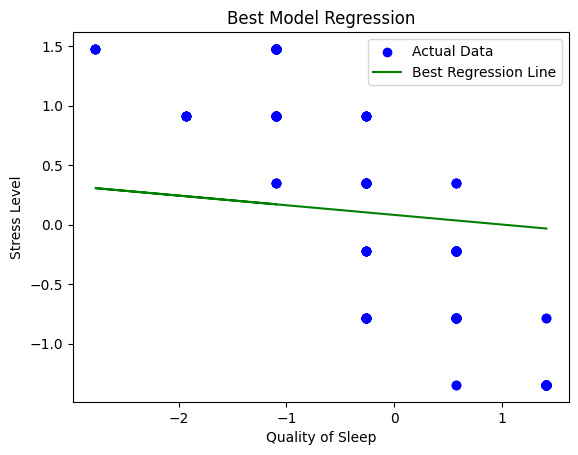

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Load dataset
df = pd.read_csv("Sleep_health.csv")
df.fillna(0, inplace=True)  # Handle missing values

# Ensure all additional variables are numeric
def process_blood_pressure(value):
    if isinstance(value, str) and '/' in value:
        try:
            systolic, diastolic = map(float, value.split('/'))
            return (systolic + diastolic) / 2
        except ValueError:
            return np.nan
    return value

if 'Blood Pressure' in df.columns:
    df['Blood Pressure'] = df['Blood Pressure'].apply(process_blood_pressure)

# Drop non-numeric columns
df = df.select_dtypes(include=[np.number])

# Drop rows with NaN or infinite values
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df.dropna(inplace=True)

# Normalize the dataset
scaler = StandardScaler()
numerical_cols = df.columns
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

# Define target and predictors
target = 'Stress Level'
predictors = ['Quality of Sleep']
results = []  # Store results

# Gradient Descent Function
def gradient_descent(X, Y, learning_rate=0.0001, epochs=1000):
    n = len(X)
    m, c = 0.1, 0.1  # Initialize coefficients
    for _ in range(epochs):
        Y_pred = m * X + c
        d_m = -(2/n) * sum(X * (Y - Y_pred))
        d_c = -(2/n) * sum(Y - Y_pred)
        m -= learning_rate * d_m
        c -= learning_rate * d_c
    return m, c

# Model 1: Single Predictor
X = df[predictors[0]].astype(float).values
Y = df[target].astype(float).values
m, c = gradient_descent(X, Y)

# Calculate MSE
Y_pred = m * X + c
mse = np.mean((Y - Y_pred)**2)

# Save results
results.append({
    'Variables': predictors,
    'MSE': mse,
    'Model': (m, c)
})

# Plot Model 1
plt.scatter(X, Y, color='orange', label='Actual Data')
plt.plot(X, Y_pred, color='red', label='Regression Line')
plt.xlabel('Quality of Sleep')
plt.ylabel('Stress Level')
plt.title('Model 2: Linear Regression using Gradient Descent')
plt.legend()
plt.show()

print(f"Model 1: slope(m) = {m}, Intercept(c) = {c}, MSE = {mse}")

# Additional Variables
add_vars = ['Physical Activity Level', 'Blood Pressure', 'Heart Rate', 'Daily Steps']

for var in add_vars:
    if var in df.columns:
        X = df[[predictors[0], var]].astype(float).values[:, 0]
        Y = df[target].astype(float).values

        # Gradient Descent
        m, c = gradient_descent(X, Y)

        # Predict and calculate MSE
        Y_pred = m * X + c
        mse = np.mean((Y - Y_pred)**2)

        # Save results
        results.append({
            'Variables': predictors + [var],
            'MSE': mse,
            'Model': (m, c)
        })

# Top 3 Models
results = sorted(results, key=lambda x: x['MSE'])
print("\nTop 3 Variable Combinations:")
for rank, res in enumerate(results[:3], start=1):
    print(f"{rank}. Variables: {res['Variables']}, MSE: {res['MSE']}")

# Visualize Best Model
best_model = results[0]
X = df[best_model['Variables'][0]].astype(float).values
Y = df[target].astype(float).values
Y_pred = best_model['Model'][0] * X + best_model['Model'][1]

plt.scatter(X, Y, color='blue', label='Actual Data')
plt.plot(X, Y_pred, color='green', label='Best Regression Line')
plt.xlabel(best_model['Variables'][0])
plt.ylabel('Stress Level')
plt.title('Best Model Regression')
plt.legend()
plt.show()


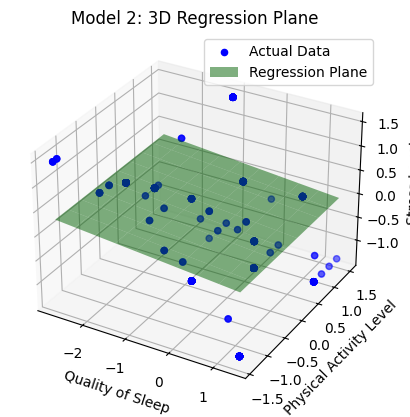

In [7]:
from mpl_toolkits.mplot3d import Axes3D

# Visualize Best Model 2 in 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
best_model_2 = results[1]

# Extract the best variables
X1 = df[best_model_2['Variables'][0]].astype(float).values  # First predictor
X2 = df[best_model_2['Variables'][1]].astype(float).values  # Second predictor
Y = df[target].astype(float).values  # Target

# Generate the regression plane
x1_range = np.linspace(X1.min(), X1.max(), 10)
x2_range = np.linspace(X2.min(), X2.max(), 10)
x1_grid, x2_grid = np.meshgrid(x1_range, x2_range)

# Access the slope (m) and intercept (c) directly
m = best_model_2['Model'][0]  # Assuming 'Model' contains (slope, intercept)
c = best_model_2['Model'][1]

# Calculate y_pred_plane using the slope and intercept for a single predictor
y_pred_plane = m * x1_grid + c

# Scatter plot of the actual data
ax.scatter(X1, X2, Y, color='blue', label='Actual Data')

# Regression plane (modified for a single predictor)
ax.plot_surface(x1_grid, x2_grid, y_pred_plane, alpha=0.5, color='green', label='Regression Plane')

# Labels and Title
ax.set_xlabel(best_model_2['Variables'][0])
ax.set_ylabel(best_model_2['Variables'][1])
ax.set_zlabel('Stress Level')
ax.set_title('Model 2: 3D Regression Plane')
plt.legend()
plt.show()